#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv',
                 usecols=["LAW_CAT_CD","ARREST_BORO","JURISDICTION_CODE","AGE_GROUP","PERP_SEX","PERP_RACE", "ARREST_PRECINCT"])

#selecting only the columns that are necessary for question

In [ ]:
df = df.drop(df[df["LAW_CAT_CD"] == "9"].index)

#dropping 9 from the target variable

In [ ]:
df = df.drop(df[df["LAW_CAT_CD"] == "I"].index)
#dropping I from the target variable

In [ ]:
df = df.drop(df[df["LAW_CAT_CD"] == "V"].index)
#dropping V from the target variable to improve the scores

In [ ]:
df = df.drop(df[df["JURISDICTION_CODE"] >= 3].index)
#dropping Jurisdiction Codes equal to or greater than 3 because they are non jurisdiction code

In [ ]:
df.dropna(how="any", inplace=True)

# dropping null and nan values

In [ ]:
df.isnull().sum()

# checking to see if there are still any null values

LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
dtype: int64

In [ ]:
%pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ff0d6f2f617b2f9e82a2b93645c2902d5e567d98484315ffc46a70743f4798e7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79ce

In [ ]:
import ydata_profiling
ydata_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Scaling and Spliting Data

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, QuantileTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, classification_report, confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numerical = ["JURISDICTION_CODE","ARREST_PRECINCT"]
#assigning all the numerical columns to be used later for scaling

In [ ]:
categorical= ["ARREST_BORO","AGE_GROUP","PERP_SEX","PERP_RACE"]
#assigning all the categorical columns to be used later for scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [ ]:
num = Pipeline( [('imputer missing', SimpleImputer(strategy='median')),
                         ('standard',QuantileTransformer(output_distribution='normal'))])
cat = Pipeline([('imputer missing', SimpleImputer(strategy='most_frequent')),
                         ('ohe', OneHotEncoder(handle_unknown='ignore'))])
ct = ColumnTransformer(transformers=[('num_features', num, numerical),
                                     ('cat_features', cat, categorical)])

# scaling both types of column
X= ct.fit_transform(df)

In [ ]:
def test_train_split():
    y = df["LAW_CAT_CD"]
    X = df[[x for x in df.columns if x != "LAW_CAT_CD"]]

    return train_test_split(X, y, test_size=0.2, random_state=0)

#creating a function to separate X and y. Make X equal to all columns except the target variable

In [ ]:
y = df["LAW_CAT_CD"]
X = df[[x for x in df.columns if x != "LAW_CAT_CD"]]

In [ ]:
X_train, X_test, y_train, y_test = test_train_split()

# slitting X and y by calling the function above

# Logistic Regression

In [ ]:
scores = {}
# where the scores of the models will be stored

In [ ]:
pipeline = ColumnTransformer(transformers=[('num_features', num, numerical),
                                                    ('cat_features', cat, categorical),])
logistic = Pipeline([('data_preprocessing',pipeline),
                             ('Model', LogisticRegression(penalty = 'none', max_iter = 10000))])
logistic.fit(X_train, y_train)

# using Logistic Regression as the model for the pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['JURISDICTION_CODE',
                                                   'ARREST_PRECINCT']),
                                                 ('cat_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ARREST_BORO', 'AGE_GROUP',
                                                   'PERP_SEX',
                                                   'PERP_RACE'])])),
                ('Model', LogisticRegression(max_iter=10000, penalty='none'))])

In [ ]:
y_pred = cross_val_predict(logistic, X_train, y_train, cv=5)
#using cross validation for the model and training the data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

In [ ]:
print(classification_report(y_train, y_pred))
scores['logistic'] = y_pred
#the scores for logistic regression model

              precision    recall  f1-score   support

           F       0.56      0.30      0.39     66868
           M       0.58      0.81      0.67     79139

    accuracy                           0.57    146007
   macro avg       0.57      0.55      0.53    146007
weighted avg       0.57      0.57      0.54    146007



In [ ]:
%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to print out confusion matric heatmap

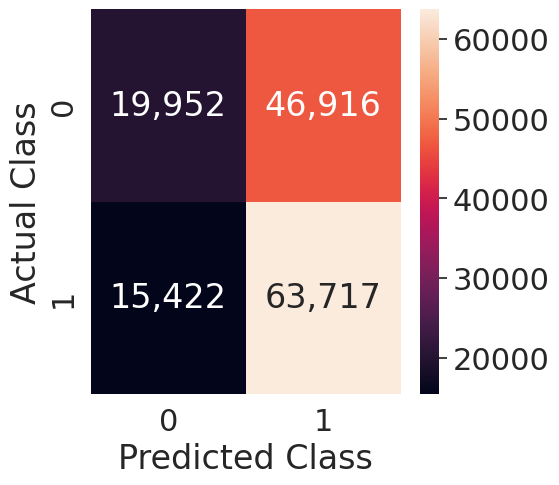

In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_train, y_pred))
pass

# calling and passing the criterias to the function

In [ ]:
log_prediction = logistic.predict(X_train)
print(accuracy_score(log_prediction, y_train))

0.5733149780489977


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
procesing_pipeline = ColumnTransformer(transformers=[('num_features', num, numerical),
                                                    ('cat_features', cat, categorical),])
svc = Pipeline([('data_preprocessing', procesing_pipeline),
                             ('classifier', SVC(kernel='rbf', gamma='auto', C=1))])
svc.fit(X_train, y_train)

# using Support Vector Machine as the model for the pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   QuantileTransformer(output_distribution='normal'))]),
                                                  ['JURISDICTION_CODE',
                                                   'ARREST_PRECINCT']),
                                                 ('cat_features',
                                                  Pipeline(steps=[('imputer '
                                                                   'missing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ARREST_BORO', 'AGE_GROUP',
                                                   'PERP_SEX',
                                                   'PERP_RACE'])])),
                ('classifier', SVC(C=1, gamma='auto'))])

In [ ]:
y_pred = cross_val_predict(svc, X_train, y_train, cv=5)
scores['svc'] = y_pred

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_train, y_pred))
pass

In [ ]:
svc_pred = svc.predict(X_train)
print(accuracy_score(y_pred, y_train))

In [ ]:
param_grid = {'classifier__C': [0.1, 1, 10],'classifier__kernel': ['linear', 'rbf']}
# defining the parameters to be used for the models

In [ ]:
grid = GridSearchCV(svc, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

#Using Gridsearch to find the best parameter and the score it produces

# Random Forest

In [ ]:
pipeline = ColumnTransformer(transformers=[('num_features', num, numerical),
                                                    ('cat_features', cat, categorical),])
rfc = Pipeline([('data_preprocessing', pipeline),
                             ('Model', RandomForestClassifier(max_depth=6, random_state=3, min_samples_leaf = 5))])
rfc.fit(X_train, y_train)
# using Random Forest Classifier as the model for the pipeline

In [ ]:
y_pred = cross_val_predict(rfc, X_train, y_train, cv=5)
print(classification_report(y_train, y_pred))
scores['rfc'] = y_pred

In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_train, y_pred))
pass

In [ ]:
rfc_prediction = rfc.predict(X_train)
print(accuracy_score(rfc_prediction,y_train))

#Voting Classifier

In [ ]:
clfs = [('rfc', rfc),
        ('log', logistic),
        ('svc', svc)]

clf_vot = VotingClassifier(clfs)
# building an ensemble model and passing the classifiers

In [ ]:
y_pred = cross_val_predict(clf_vot, X_train, y_train)
print(classification_report(y_train, y_pred))

# getting the score for the model by using cross validation

# Feature Selection

In [ ]:
 from sklearn.feature_selection import SelectKBest
 from sklearn.feature_selection import f_classif
 from sklearn.svm import LinearSVC
 from sklearn.feature_selection import SelectFromModel
 from sklearn.decomposition import PCA


In [ ]:
pipeline = ColumnTransformer(transformers=[('num_features', num, numerical),
                                                    ('cat_features', cat, categorical),])
rfc = Pipeline([('data_preprocessing', pipeline),
                ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
                ('Model', RandomForestClassifier(max_depth=6, random_state=3, min_samples_leaf = 5))])
rfc.fit(X_train, y_train)

# implementing feature selction in the pipeline to only choose useful features

In [ ]:
y_pred = cross_val_predict(rfc, X_train, y_train, cv=5)
print(classification_report(y_train, y_pred))
scores['rfc'] = y_pred

In [ ]:
rfc_prediction = rfc.predict(X_train)
print(accuracy_score(rfc_prediction,y_train))

In [ ]:
pipeline = ColumnTransformer(transformers=[('num_features', num, numerical),
                                                    ('cat_features', cat, categorical),])
svc = Pipeline([('data_preprocessing', pipeline),
                ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
                ('Model',SVC(kernel='rbf', gamma='auto', C=1))])
svc.fit(X_train, y_train)

In [ ]:
y_pred = cross_val_predict(svc, X_train, y_train, cv=10)
print(classification_report(y_train, y_pred))
scores['svc'] = y_pred